# Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Loading the iris dataset
raw_data = pd.read_csv('/kaggle/input/iris-dataset/iris-dataset.csv')
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Ploting the data

We will try to cluster the iris flowers by the shape of their sepal. 

<i> We will use the 'sepal_length' and 'sepal_width' variables.</i>

[Text(0.5, 1.0, 'Sepal Length vs Sepal Width')]

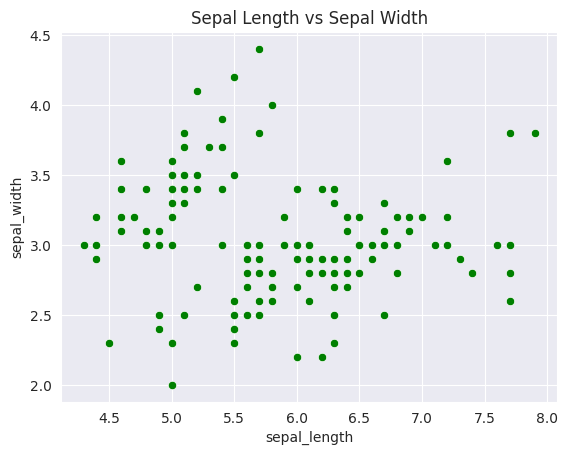

In [3]:
sns.set_style('darkgrid')
sns.scatterplot(x='sepal_length', y='sepal_width', data=raw_data, c='g').set(title='Sepal Length vs Sepal Width')

# Clustering raw data

Initially we will separate the original data into 2 clusters.

In [4]:
x = raw_data.copy()
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
kmeans = KMeans(2)
kmeans.fit(x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [6]:
clusters = raw_data.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)
clusters.head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


[Text(0.5, 1.0, 'Sepal Length vs Sepal Widht')]

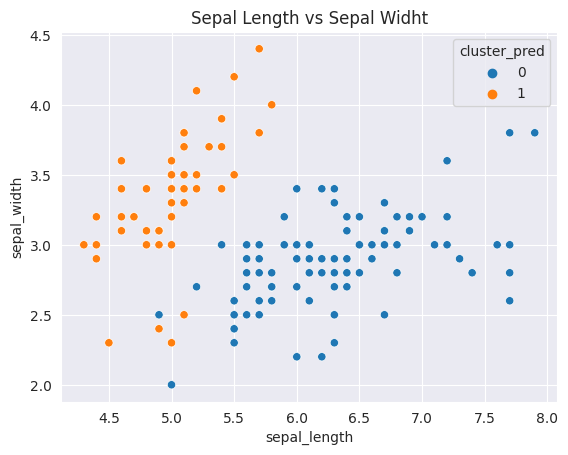

In [7]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue=clusters['cluster_pred'], palette='tab10', data=clusters).set(title='Sepal Length vs Sepal Widht')

## Standardizing the variables

We will import and use the <i> scale </i> method from sklearn to standardize the data.

In [8]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(raw_data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Clustering scaled data

In [9]:
kmeans_scl =KMeans(2)
kmeans_scl.fit(x_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [10]:
clusters_scl = raw_data.copy()
clusters_scl['clusters_pred'] = kmeans_scl.fit_predict(x_scaled)
clusters_scl.head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,clusters_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[Text(0.5, 1.0, 'Sepal Lenght vs Sepal Width (Scaled)')]

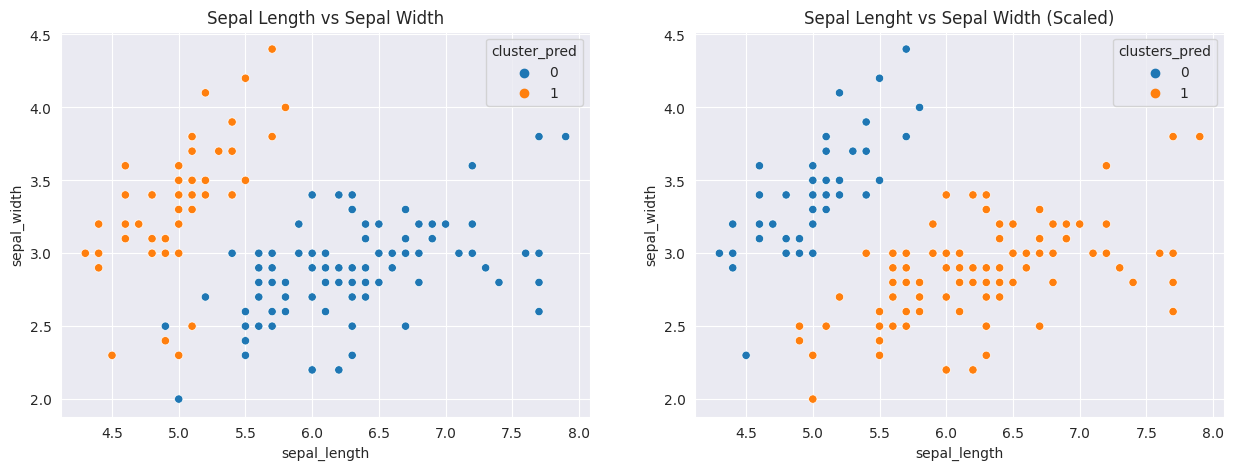

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(x='sepal_length', y='sepal_width', hue=clusters['cluster_pred'], palette='tab10', data=clusters, ax=ax1).set(title='Sepal Length vs Sepal Width')
sns.scatterplot(data=clusters_scl, x='sepal_length', y='sepal_width', hue='clusters_pred', palette='tab10', ax=ax2).set(title='Sepal Lenght vs Sepal Width (Scaled)')

Looks like the two solutions are mostly identical. That is because the original features have very similar scales.

## Take Advantage of the Elbow Method to Determine the Numbers of Clusters

### WCSS- Within-clusters Sum of Squares

In [12]:
num_of_clusters = range(1,9)
wcss = []
for i in num_of_clusters:
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

[600.0,
 223.73200573676348,
 140.96837895511078,
 114.61550694959809,
 91.19197002146464,
 80.16566642392937,
 72.17426599623303,
 63.48155501081076]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

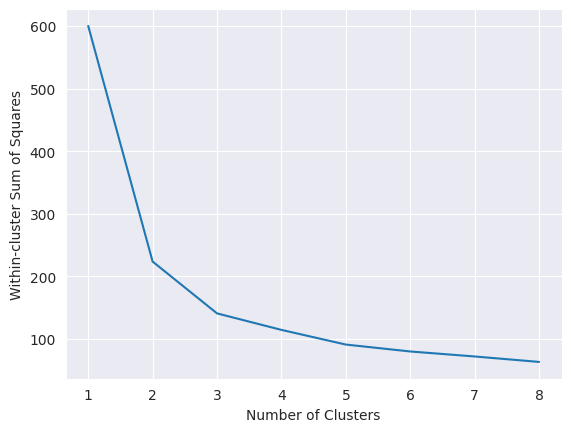

In [13]:
plt.plot(num_of_clusters,wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Understanding the Elbow Curve

Based on the Elbow Curve, 2, 3 or 5 seem the most likely. We have already seen the 2 clusters solution. Let's see 3 and 5 clusters solution.

# 3 clusters solution

In [14]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
clusters_scl3 = raw_data.copy()
clusters_scl3['clusters_pred'] = kmeans_3.fit_predict(x_scaled)
clusters_scl3.head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,clusters_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


[Text(0.5, 1.0, 'Sepal Length vs Sepal Width')]

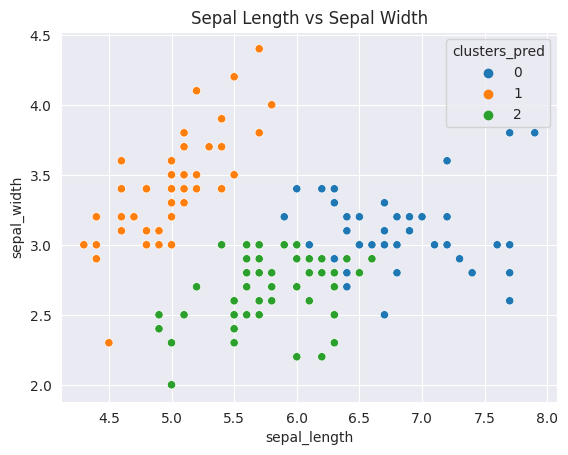

In [16]:
sns.scatterplot(data=clusters_scl3, x = 'sepal_length', y = 'sepal_width', hue='clusters_pred', palette='tab10').set(title='Sepal Length vs Sepal Width')

# 5 Cluster solution

In [17]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [18]:
clusters_scl5 = raw_data.copy()
clusters_scl5['clusters_pred'] = kmeans_5.fit_predict(x_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[Text(0.5, 1.0, 'Sepal Length vs Sepal Width')]

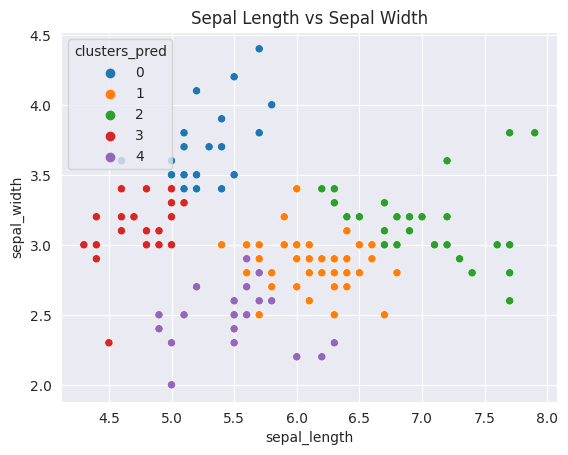

In [19]:
sns.scatterplot(data=clusters_scl5, x = 'sepal_length', y = 'sepal_width', hue='clusters_pred', palette='tab10').set(title='Sepal Length vs Sepal Width')

## Comparing solutions to the original iris dataset

Obviously there are only 3 species of Iris, because that's the original iris dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 Species (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [20]:
real_data = pd.read_csv('/kaggle/input/iris-dataset/iris-with-answers.csv')
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Scatter plots (which we will use for comparison)

#### 'Real data'

Looking at the first graph it seems like the clustering solution is much more intertwined than what we imagined (and what we found before)

[Text(0.5, 1.0, 'Sepal Length vs Sepal Width (K-Means)')]

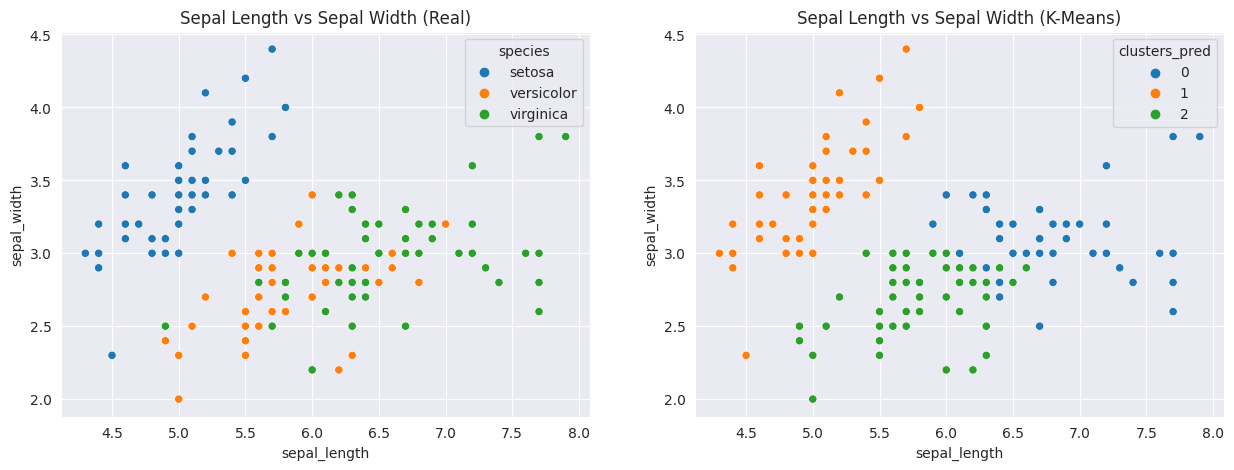

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=real_data, x='sepal_length', y='sepal_width', hue='species', palette='tab10', ax=ax1).set(title='Sepal Length vs Sepal Width (Real)')
sns.scatterplot(data=clusters_scl3, x = 'sepal_length', y = 'sepal_width', hue='clusters_pred', palette='tab10', ax=ax2).set(title='Sepal Length vs Sepal Width (K-Means)')

[Text(0.5, 1.0, 'Petal Length vs Petal Width (K-Means)')]

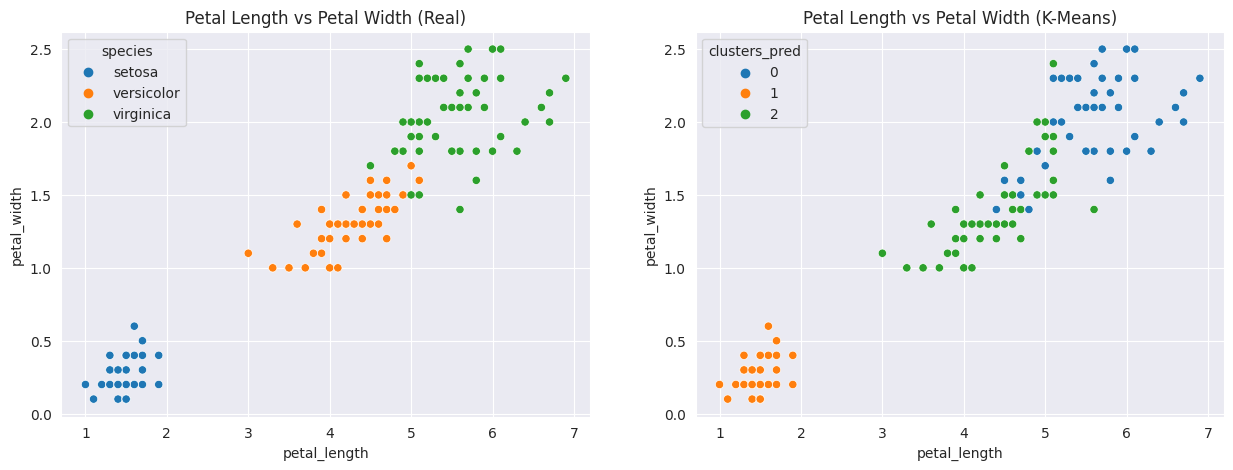

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=real_data, x='petal_length', y='petal_width', hue='species', palette='tab10', ax=ax1).set(title='Petal Length vs Petal Width (Real)')
sns.scatterplot(data=clusters_scl3, x = 'petal_length', y = 'petal_width', hue='clusters_pred', palette='tab10', ax=ax2).set(title='Petal Length vs Petal Width (K-Means)')

# Overall summary
Examining the scatter plot 'Petal Length vs Petal Width (Real)', we see that the features which actually make the species different are petals and NOT sepals. Though <i>setosa</i> can be seperated with ease as cluster in 'Sepal Lenght vs Sepal Width (Real)', it is hard to recognise <i>versicolor and virginica</i> as different cluster.

In 'Petal Length vs Petal Width', Real and K-means clusters are quite similar. In this scenerio K-means have done a good job predicting the species based on petal lenght and width. It remains to be seen how accurate is the result K-means can produce.

Note that 'real data' is the data observed in the real world (biological data)